# Analyzing Ibovespa's stocks individual returns

---

By Fabio Prikladnicki [(Github)](https://github.com/fabiopri)

---

In this code, we'll analyze **returns of individual stocks which compose Ibovespa** (the reference index of B3, the Brazilian stock exchange) in the **last 5 years**.

This analysis is for educational purposes only and does not address survivorship bias.

### Importing libraries

In [1]:
# Data wrangling
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go

# Datetime
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Stock data
import yfinance as yf

### Reading a CSV with Ibovespa's composition in August 10th, 2023

In [2]:
ibov_raw = pd.read_csv('ibov_2023-08-10.csv', sep=';', encoding='UTF-8')
ibov_raw.head()

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,RRRP3,3R PETROLEUM,ON NM,234.689.601,"0,42"
1,ALSO3,ALIANSCSONAE,ON NM,532.365.440,"0,628"
2,ALPA4,ALPARGATAS,PN N1,201.952.502,"0,093"
3,ABEV3,AMBEV S/A,ON,4.386.652.506,"3,058"
4,ARZZ3,AREZZO CO,ON NM,60.758.326,"0,244"


### Extracting stocks' symbols and converting it to a list

In [3]:
ibov_list = ibov_raw['Código'].tolist()
ibov_list[:5]

['RRRP3', 'ALSO3', 'ALPA4', 'ABEV3', 'ARZZ3']

### Including '.SA' suffix so we can download Brazilian stock data from Yahoo Finance

In [4]:
ibov_list = [x + '.SA' for x in ibov_list]
ibov_list[:5]

['RRRP3.SA', 'ALSO3.SA', 'ALPA4.SA', 'ABEV3.SA', 'ARZZ3.SA']

### Setting start date (5 years ago) and end date (yesterday) for stock data

In [5]:
# Dia final: ontem
end = datetime.today() - relativedelta(days=1)

# Dia de início: 5 anos atrás
start = end - relativedelta(years=5)

### Downloading stock data from Yahoo Finance

In [6]:
ibov = yf.download(ibov_list, start = start, end = end)['Adj Close']

[*********************100%***********************]  85 of 85 completed


In [7]:
ibov.head(3)

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-09,16.310068,9.765615,20.765949,38.659683,NaN,24.020000,6.410457,24.373322,13.192660,14.686314,...,9.646331,8.898018,19.825264,6.944071,36.790123,13.876581,7.07,25.226330,8.419005,22.127193
2018-08-10,16.005365,9.514611,20.356220,38.158192,NaN,23.100000,6.278170,23.031338,12.504264,13.955148,...,9.349775,8.758391,18.664663,6.439344,36.697861,13.262065,6.68,24.710833,8.078698,21.470913
2018-08-13,16.200033,9.545986,20.365530,37.456120,NaN,23.360001,6.311241,23.140150,12.809132,14.226312,...,9.366251,8.780606,19.034487,6.594018,37.102386,13.333522,6.61,25.159386,8.218549,21.834528


### Checking columns with NA values

In [8]:
ibov.columns[ibov.isna().any()].tolist()

['ASAI3.SA',
 'BPAC11.SA',
 'CASH3.SA',
 'CMIN3.SA',
 'ENGI11.SA',
 'IGTI11.SA',
 'KLBN11.SA',
 'LWSA3.SA',
 'NTCO3.SA',
 'PETZ3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RRRP3.SA',
 'SANB11.SA',
 'SOMA3.SA',
 'TAEE11.SA']

In [9]:
# Visualizing columns with NA values

ibov.loc[:, ibov.isna().any()]

,ASAI3.SA,BPAC11.SA,CASH3.SA,CMIN3.SA,ENGI11.SA,IGTI11.SA,KLBN11.SA,LWSA3.SA,NTCO3.SA,PETZ3.SA,RAIZ4.SA,RDOR3.SA,RRRP3.SA,SANB11.SA,SOMA3.SA,TAEE11.SA
Date,,,,,,,,,,,,,,,,
2018-08-09,NaN,4.357040,NaN,NaN,23.536375,NaN,15.632925,NaN,NaN,NaN,NaN,NaN,NaN,27.182320,NaN,12.128618
2018-08-10,NaN,4.212881,NaN,NaN,23.080566,NaN,15.318811,NaN,NaN,NaN,NaN,NaN,NaN,26.121269,NaN,11.954278
2018-08-13,NaN,4.389314,NaN,NaN,23.445215,NaN,15.423512,NaN,NaN,NaN,NaN,NaN,NaN,26.327578,NaN,12.071357
2018-08-14,NaN,4.479085,NaN,NaN,23.710417,NaN,15.584597,NaN,NaN,NaN,NaN,NaN,NaN,26.386526,NaN,12.508859
2018-08-15,NaN,4.398983,NaN,NaN,23.266836,NaN,15.544325,NaN,NaN,NaN,NaN,NaN,NaN,26.239155,NaN,12.662909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-03,13.80,32.983196,9.31,4.29,49.299999,22.580000,23.219999,7.14,17.799999,6.85,4.10,34.540001,35.880001,28.440001,11.24,35.508404
2023-08-04,13.69,32.548557,9.50,4.21,48.980000,22.410000,23.510000,7.09,17.730000,7.04,4.08,34.889999,36.680000,27.820000,11.36,35.586403
2023-08-07,13.87,33.009998,8.84,4.27,48.340000,22.180000,23.330000,7.09,17.520000,6.88,4.02,34.630001,36.320000,27.840000,11.17,35.440155


#### I checked previously that there are missing values for some stocks before 2021. To simplify our analysis, we'll drop columns with NA

In [10]:
ibov_no_na = ibov.dropna(axis='columns')
ibov_no_na.head()

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-09,16.310068,9.765615,20.765949,38.659683,24.020000,6.410457,24.373322,13.192660,14.686314,16.139553,...,9.646331,8.898018,19.825264,6.944071,36.790123,13.876581,7.07,25.226330,8.419005,22.127193
2018-08-10,16.005365,9.514611,20.356220,38.158192,23.100000,6.278170,23.031338,12.504264,13.955148,15.709775,...,9.349775,8.758391,18.664663,6.439344,36.697861,13.262065,6.68,24.710833,8.078698,21.470913
2018-08-13,16.200033,9.545986,20.365530,37.456120,23.360001,6.311241,23.140150,12.809132,14.226312,16.185829,...,9.366251,8.780606,19.034487,6.594018,37.102386,13.333522,6.61,25.159386,8.218549,21.834528
2018-08-14,16.428562,9.961710,20.365530,38.522907,24.120001,6.429749,23.938084,12.986146,14.468418,16.587078,...,9.654571,8.942444,19.975025,6.724271,37.443031,13.976616,7.08,25.246420,8.190578,22.455328
2018-08-15,16.437027,9.718552,20.365530,37.757015,24.309999,6.391166,23.430302,12.902553,14.294104,17.307959,...,9.522769,8.885325,19.381477,6.455626,35.775272,13.519305,6.70,25.052271,8.218549,20.885584


### Extracting the first and last rows so we can calculate returns in the last 5 years

In [11]:
ibov_pri_ult = ibov_no_na.iloc[[0, -1]]
ibov_pri_ult

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-09,16.310068,9.765615,20.765949,38.659683,24.02,6.410457,24.373322,13.19266,14.686314,16.139553,...,9.646331,8.898018,19.825264,6.944071,36.790123,13.876581,7.07,25.226330,8.419005,22.127193
2023-08-09,14.380000,9.500000,24.330000,82.820000,16.59,14.300000,46.730000,13.73000,15.330000,32.160000,...,14.710000,28.290001,19.170000,7.000000,66.849998,16.870001,1.89,42.310001,40.779999,21.730000


In [12]:
ibov_delta = round((ibov_pri_ult.pct_change().dropna() * 100), 2)
ibov_delta

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-09,-11.83,-2.72,17.16,114.23,-30.93,123.07,91.73,4.07,4.38,99.26,...,52.49,217.94,-3.31,0.81,81.71,21.57,-73.27,67.72,384.38,-1.8


### Transposing the dataset for a better visualization and changing column names (also removing '.SA' suffix)

In [13]:
# Transpondo o DataFrame para ficar mais fácil de plotar

ibov_delta_transp = ibov_delta.T

ibov_delta_transp.columns = ['Delta']
ibov_delta_transp.index.names = ['Ticker']
ibov_delta_transp.index = ibov_delta_transp.index.str.removesuffix('.SA')
ibov_delta_transp.head()

,Delta
Ticker,
ABEV3,-11.83
ALPA4,-2.72
ALSO3,17.16
ARZZ3,114.23
AZUL4,-30.93


In [14]:
ibov_delta_transp.head()

,Delta
Ticker,
ABEV3,-11.83
ALPA4,-2.72
ALSO3,17.16
ARZZ3,114.23
AZUL4,-30.93


### Boxplot of returns

#### We can spot an outlier at the top. We'll check this later

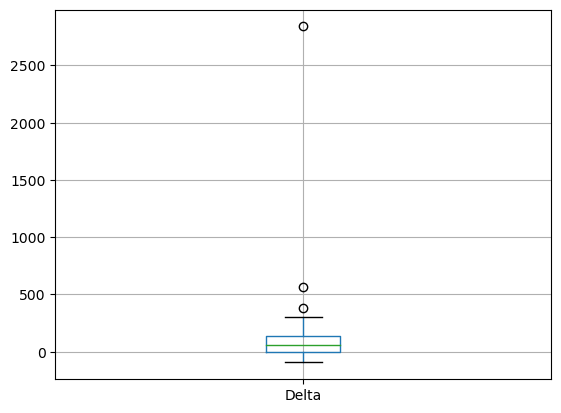

In [15]:
# Boxplot com os retornos

ibov_delta_transp.boxplot();

### Density chart of returns

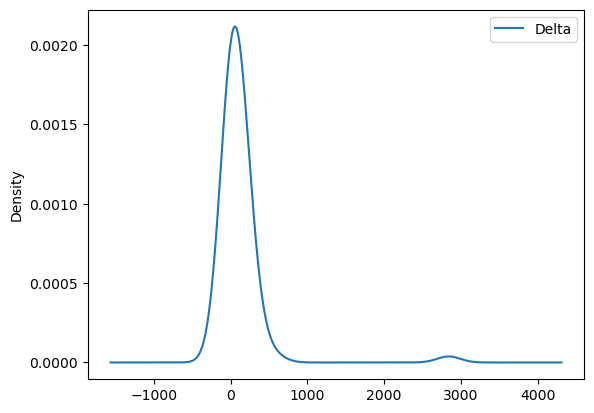

In [16]:
ibov_delta_transp.plot.kde();

### Histogram of returns

#### The number of bins is set to the number of stocks

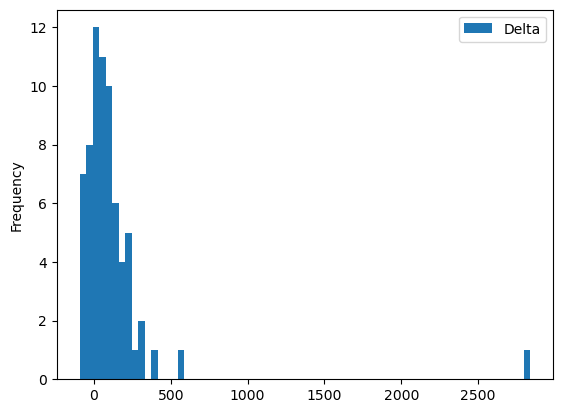

In [17]:
ibov_delta_transp.plot.hist(bins=ibov_delta_transp.shape[0]);

### What are the 10 stocks with higher returns in the last 5 years?

#### Here we can see that PRIO3 is a "natural" outlier

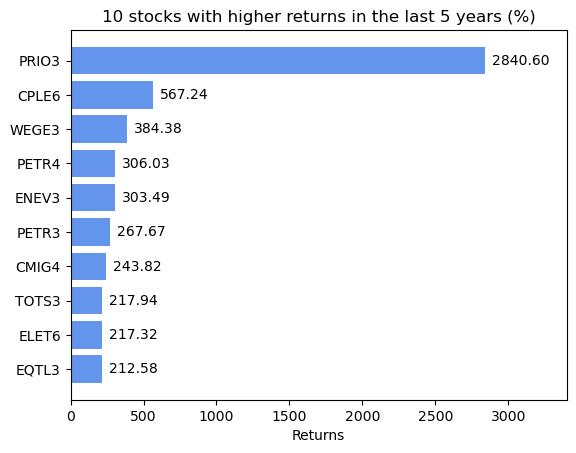

In [18]:
# Sorting stocks by higher returns
ibov_5y_top10 = ibov_delta_transp.sort_values(by='Delta', ascending=False).head(10)

# Plotting
fig, ax = plt.subplots()

hbars = ax.barh(ibov_5y_top10.index, ibov_5y_top10['Delta'], color='cornflowerblue')
ax.set_xlabel('Returns')
ax.set_title('10 stocks with higher returns in the last 5 years (%)')
ax.invert_yaxis()

ax.bar_label(hbars, fmt='%.2f', padding=5)
ax.set_xlim(right=3400)

plt.show()

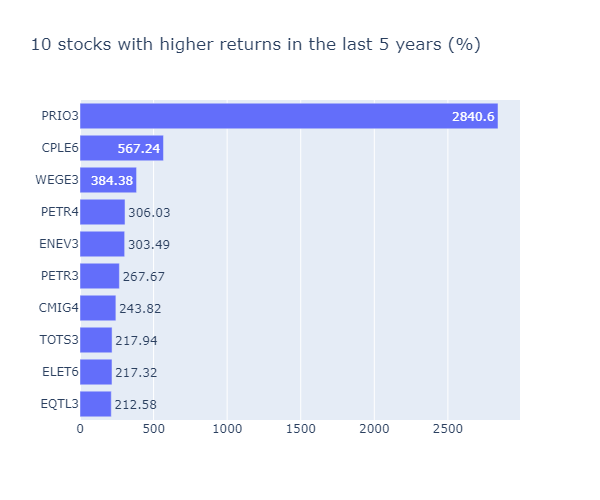

In [19]:
# Sorting stocks by higher returns
ibov_5y_top10 = ibov_delta_transp.sort_values(by='Delta', ascending=False).head(10)

# Plotting
fig = go.Figure()

fig.add_trace(go.Bar(
    x=ibov_5y_top10['Delta'],
    y=ibov_5y_top10.index,
    orientation='h',
    text=ibov_5y_top10['Delta']))

fig.update_traces(textfont_size=12)

fig.update_layout(
    autosize=False,
    width=600,
    height=500,
    yaxis={'categoryorder': 'total ascending'},
    title_text='10 stocks with higher returns in the last 5 years (%)')

fig.show('png')

### What are the 10 stocks with lower returns in the last 5 years?

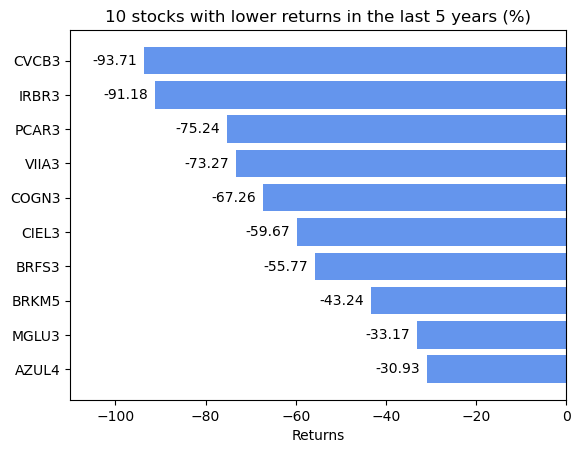

In [20]:
# Sorting stocks by lower returns
ibov_5y_bottom10 = ibov_delta_transp.sort_values(by='Delta').head(10)

# Plotting
fig, ax = plt.subplots()

hbars = ax.barh(ibov_5y_bottom10.index, ibov_5y_bottom10['Delta'], color='cornflowerblue')
ax.set_xlabel('Returns')
ax.set_title('10 stocks with lower returns in the last 5 years (%)')
ax.invert_yaxis()

ax.bar_label(hbars, fmt='%.2f', padding=5)
ax.set_xlim(-110, 0)

plt.show()

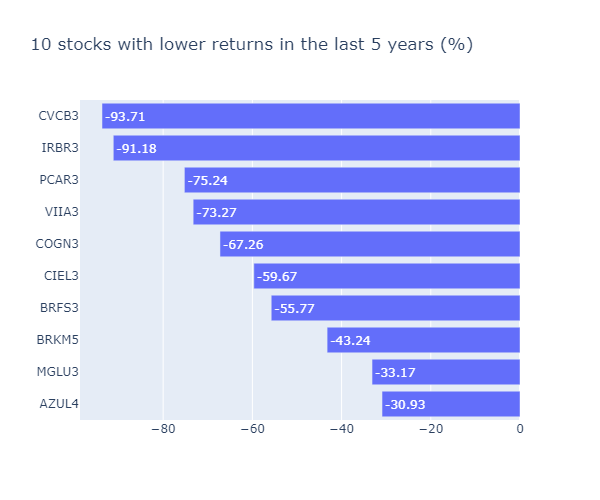

In [21]:
# Sorting stocks by lower returns
ibov_5y_bottom10 = ibov_delta_transp.sort_values(by='Delta').head(10)

# Plotting
fig = go.Figure()

fig.add_trace(go.Bar(
    x=ibov_5y_bottom10['Delta'],
    y=ibov_5y_bottom10.index,
    orientation='h',
    text=ibov_5y_bottom10['Delta']))

fig.update_traces(textfont_size=12, textposition='inside')

fig.update_layout(
    autosize=False,
    width=600,
    height=500,
    yaxis={'categoryorder': 'total descending'},
    title_text='10 stocks with lower returns in the last 5 years (%)')

fig.show('png')

### What is the proportion of positive and negative returns in the last 5 years?

In [22]:
# Indicando ações com retorno negativo e positivo

ibov_delta_transp = ibov_delta_transp.assign(
    PosNeg = ['Positive' if x > 0 else 'Negative' for x in ibov_delta_transp['Delta']])
ibov_delta_transp.head()

,Delta,PosNeg
Ticker,,
ABEV3,-11.83,Negative
ALPA4,-2.72,Negative
ALSO3,17.16,Positive
ARZZ3,114.23,Positive
AZUL4,-30.93,Negative


In [23]:
# Quantas ações tiveram retornos positivos e negativos

PosNeg = ibov_delta_transp['PosNeg'].value_counts().to_frame()
PosNeg

,PosNeg
Positive,49
Negative,20


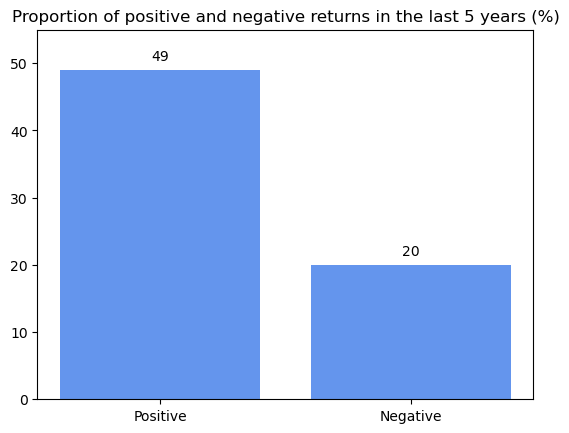

In [26]:
# Plotting
fig, ax = plt.subplots()

bars = ax.bar(PosNeg.index, PosNeg['PosNeg'], color='cornflowerblue')
ax.set_title('Proportion of positive and negative returns in the last 5 years (%)')

ax.bar_label(bars, padding=5)
ax.set_ylim(0, 55)

plt.show()

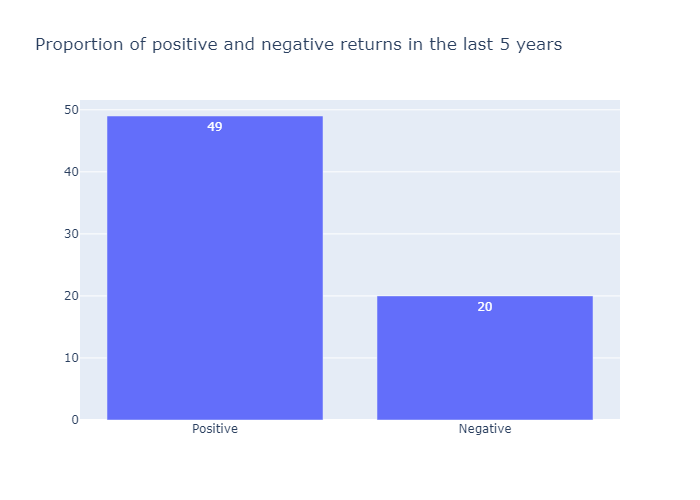

In [25]:
fig = go.Figure()

fig.add_traces(go.Bar(x=PosNeg.index, y=PosNeg['PosNeg'], text=PosNeg['PosNeg']))

fig.update_layout(title_text='Proportion of positive and negative returns in the last 5 years')

fig.show('png')